In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
apple = pd.read_csv(r'C:\Users\Dell\Downloads\AAPL.csv')
ibm = pd.read_csv(r'C:\Users\Dell\Downloads\IBM (1).csv')
amazon = pd.read_csv(r'C:\Users\Dell\Downloads\AMZN.csv')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-15,83.312500,86.419998,83.144997,85.747498,85.173584,138808800
1,2020-06-16,87.864998,88.300003,86.180000,88.019997,87.430885,165428800
2,2020-06-17,88.787498,88.849998,87.772499,87.897499,87.309204,114406400
3,2020-06-18,87.852501,88.362503,87.305000,87.932503,87.343979,96820400
4,2020-06-19,88.660004,89.139999,86.287498,87.430000,86.844833,264476000


In [3]:
apll=apple[['Date','Adj Close']]
IBM=ibm[['Date','Adj Close']]
amzn=amazon[['Date','Adj Close']]

In [4]:
apll=apll.set_index('Date')
IBM=IBM.set_index('Date')
amzn=amzn.set_index('Date')

In [5]:
stocks=pd.concat([apll,IBM,amzn],axis=1)
stocks.columns=['apple','ibm','amazon']

In [7]:
#Computing Returns:
returns= stocks/stocks.shift(1)
returns

,apple,ibm,amazon
Date,,,
2020-06-15,NaN,NaN,NaN
2020-06-16,1.026502,1.028771,1.016555
2020-06-17,0.998608,0.992010,1.009831
2020-06-18,1.000398,1.000081,1.004922
2020-06-19,0.994285,0.986388,1.007924
...,...,...,...
2021-06-08,1.006672,1.007094,1.020669
2021-06-09,1.003077,1.010733,1.005220
2021-06-10,0.991977,0.999137,1.020877


In [8]:
logreturns=np.log(returns)
logreturns

,apple,ibm,amazon
Date,,,
2020-06-15,NaN,NaN,NaN
2020-06-16,0.026157,0.028365,0.016419
2020-06-17,-0.001393,-0.008022,0.009783
2020-06-18,0.000398,0.000081,0.004910
2020-06-19,-0.005731,-0.013705,0.007893
...,...,...,...
2021-06-08,0.006650,0.007069,0.020458
2021-06-09,0.003072,0.010676,0.005207
2021-06-10,-0.008056,-0.000863,0.020662


In [9]:
#Sharpe Ratio:

noofportfolios=1000
mlr=logreturns.mean()
Sigma=logreturns.cov()
weights=np.zeros((noofportfolios,3))
expectedreturn=np.zeros(noofportfolios)
expectdvolatility=np.zeros(noofportfolios)
Sharperatio=np.zeros(noofportfolios)
for k in range(noofportfolios):
    w=np.array(np.random.random(3))
    w=w/np.sum(w)
    weights[k,:]=w
    expectedreturn[k]=np.sum(mlr*w)
    expectdvolatility[k]=np.sqrt(np.dot(w.T,np.dot(Sigma,w)))
    Sharperatio[k]=expectedreturn[k]/expectdvolatility[k]
    

In [10]:
maxindex=Sharperatio.argmax()
weights[maxindex,:]

array([0.40358557, 0.51609926, 0.08031517])

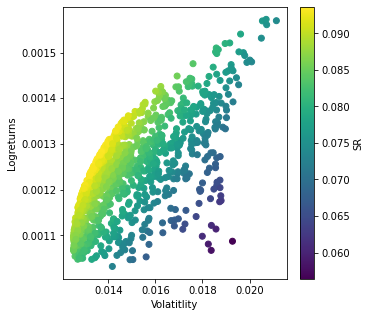

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(expectdvolatility,expectedreturn,c=Sharperatio)
plt.xlabel('Volatitlity')
plt.ylabel('Logreturns')
plt.colorbar(label='SR')
plt.show()